# Анализ и кластеризация стран


Источник данных: все данные былы созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Цель: 

### Найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров.

----

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./CIA_Country_Facts.csv')

## Исследование данных (Exploratory Data Analysis)

In [249]:
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [251]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Визуализация данных

<AxesSubplot:xlabel='Population', ylabel='Count'>

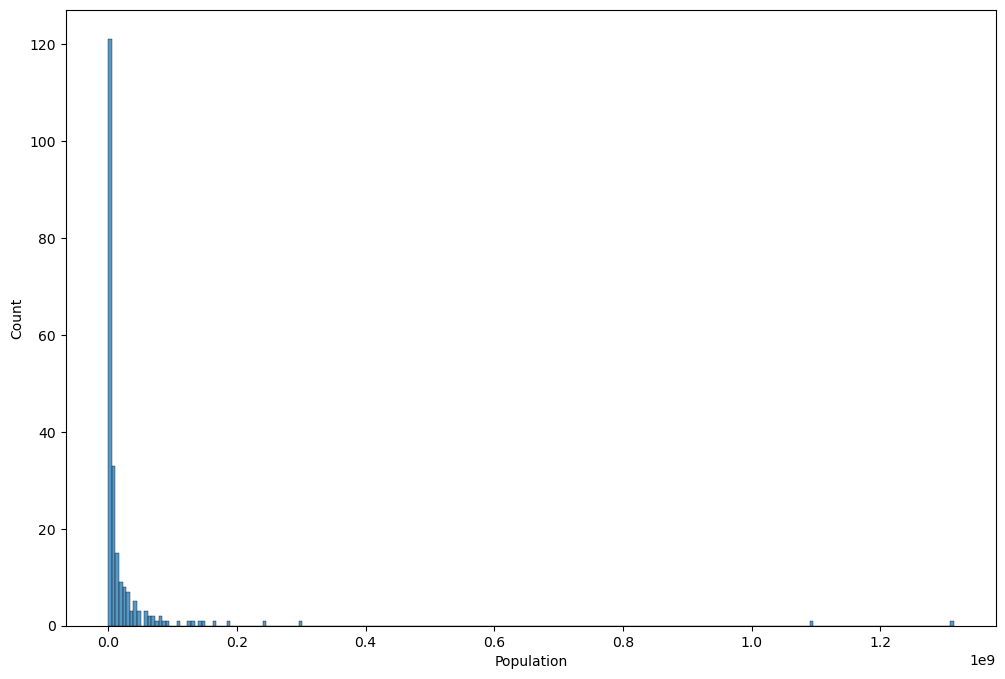

In [252]:
# Гистограмма для колонки Population
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Population")

**Гистограмма очень перекошена из-за нескольких очень больших стран. Покажем только страны с населением меньше 0.5 миллиарда людей.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

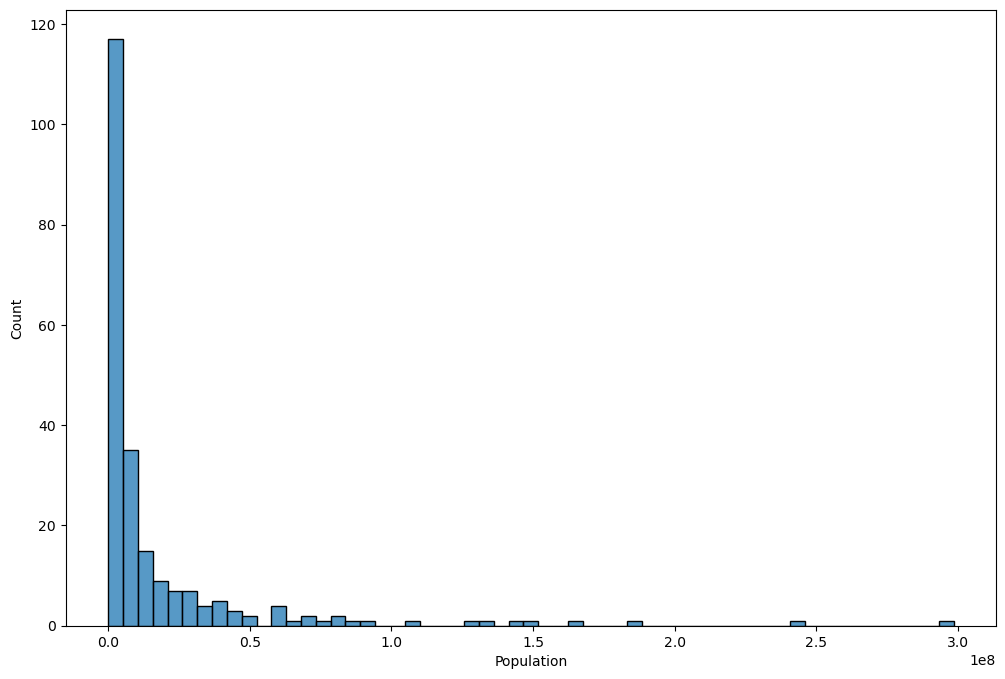

In [253]:
plt.figure(figsize=(12,8))
sns.histplot(data=df[df["Population"] < 500_000_000], x="Population")

**Исследуем GDP (ВВП - Валовый Внутренний Продукт) и регионы (Regions)**

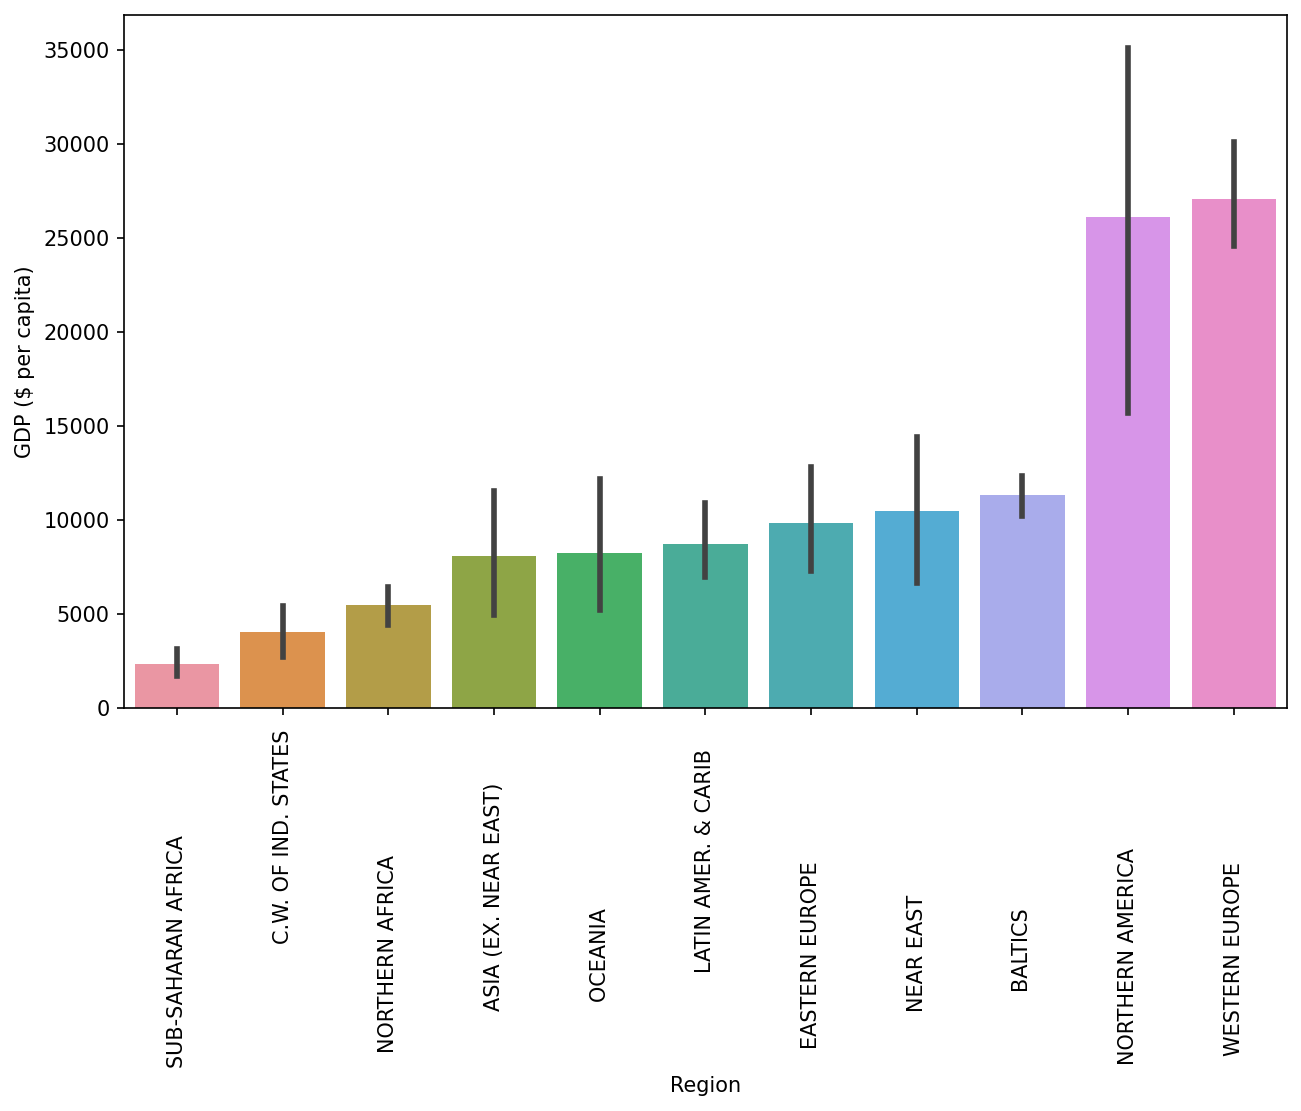

In [254]:
# Среднее ВВП на душу населения для каждого региона
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(data=df, 
            x="Region", 
            y="GDP ($ per capita)",
            order=df.groupby("Region").mean().sort_values("GDP ($ per capita)").index)
plt.xticks(rotation=90);

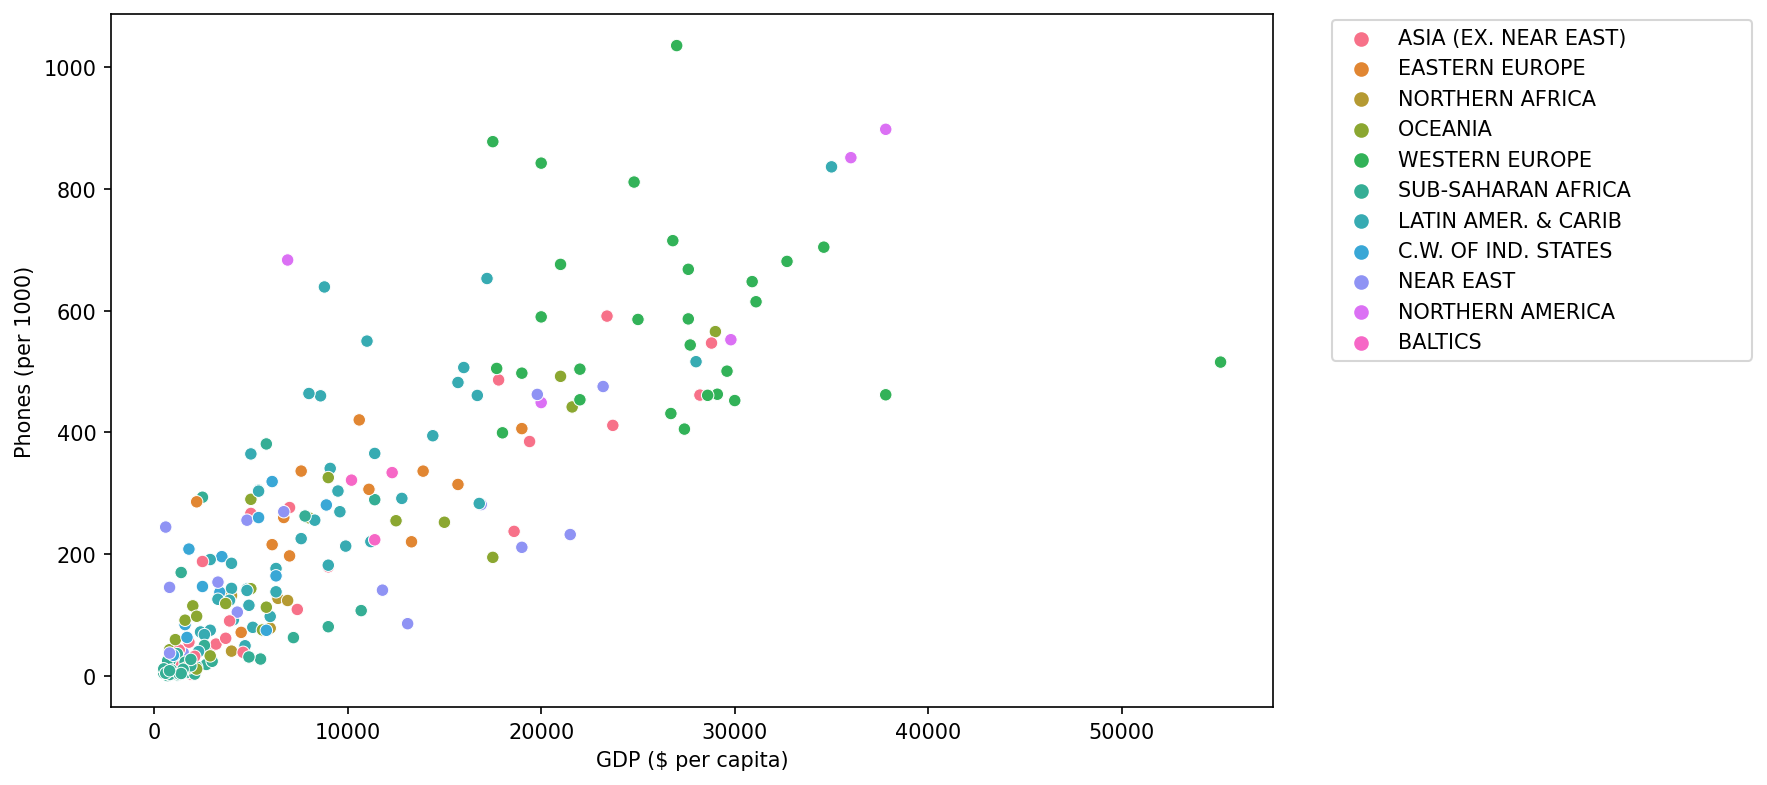

In [255]:
# Связь между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения"
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=df, x="GDP ($ per capita)", y="Phones (per 1000)", hue="Region")
plt.legend(loc=(1.05, 0.5))

<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

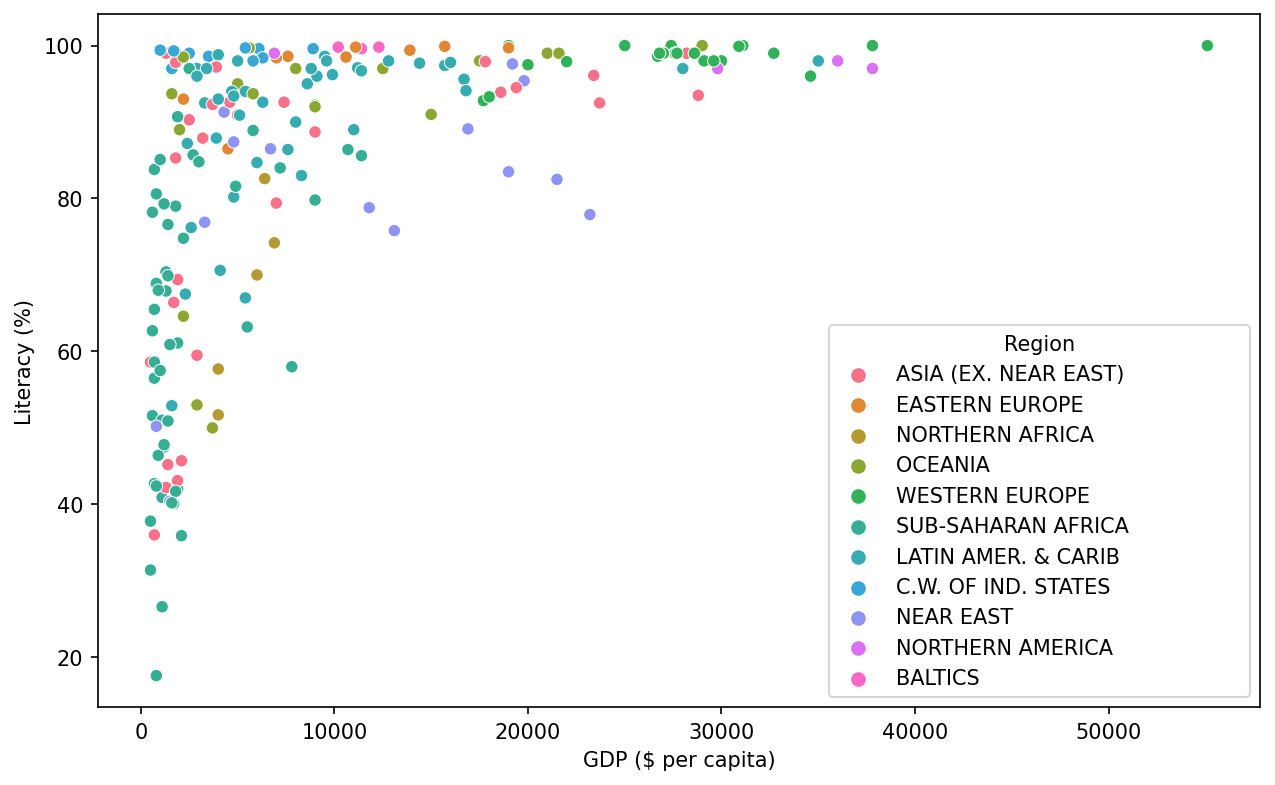

In [256]:
# Scatterplot для колонок "GDP per Capita" и "Literacy"
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=df, x="GDP ($ per capita)", y="Literacy (%)", hue="Region")

**Из графика видно, что страны с высокой грамотностью обладают большим ВВП**

**Задание: Постройте тепловую карту Heatmap для корреляций между колонками в датафрейме.**

<AxesSubplot:>

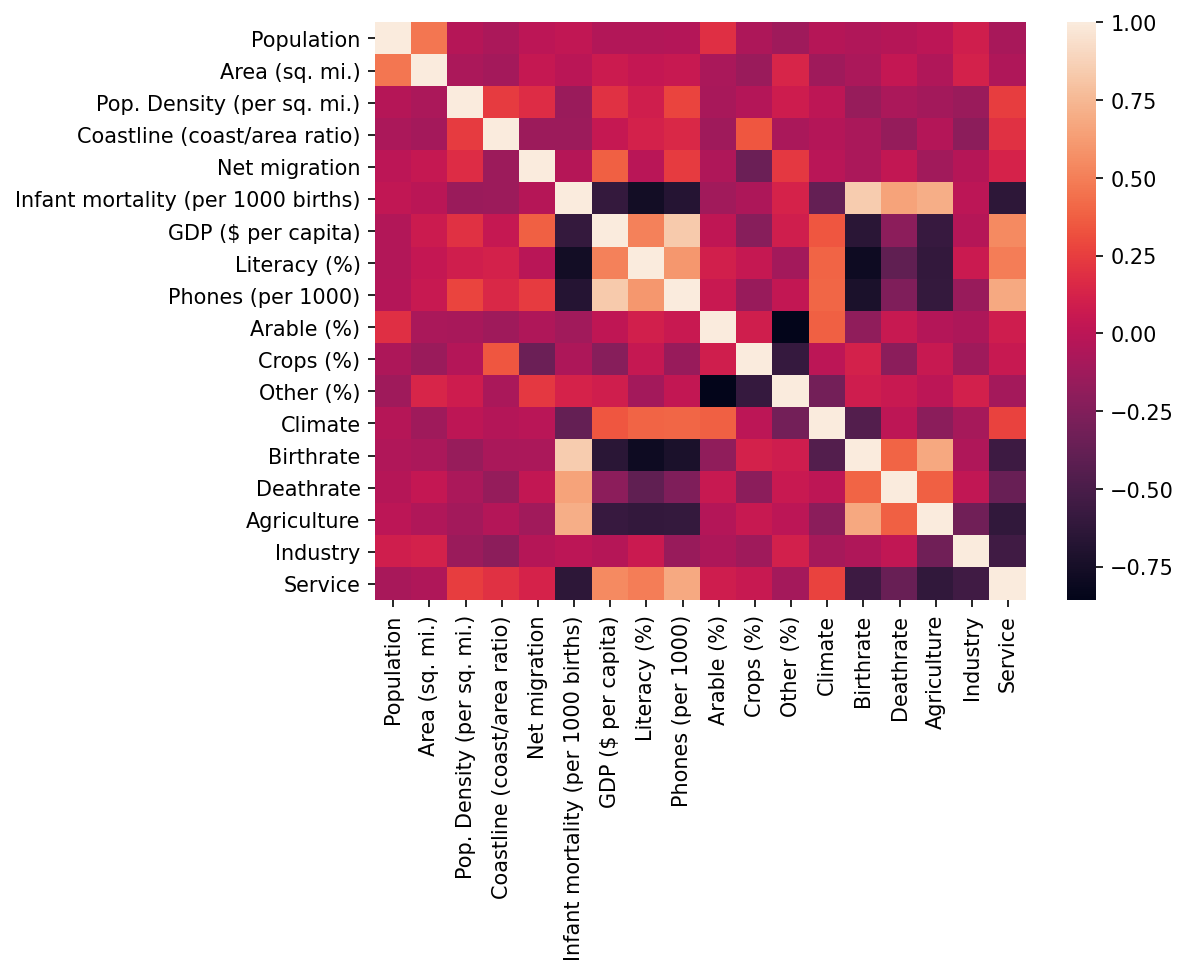

In [257]:
# Корреляции между колонками
plt.figure(figsize=(7, 5), dpi=150)
sns.heatmap(data=df.corr())

<Figure size 1200x750 with 0 Axes>

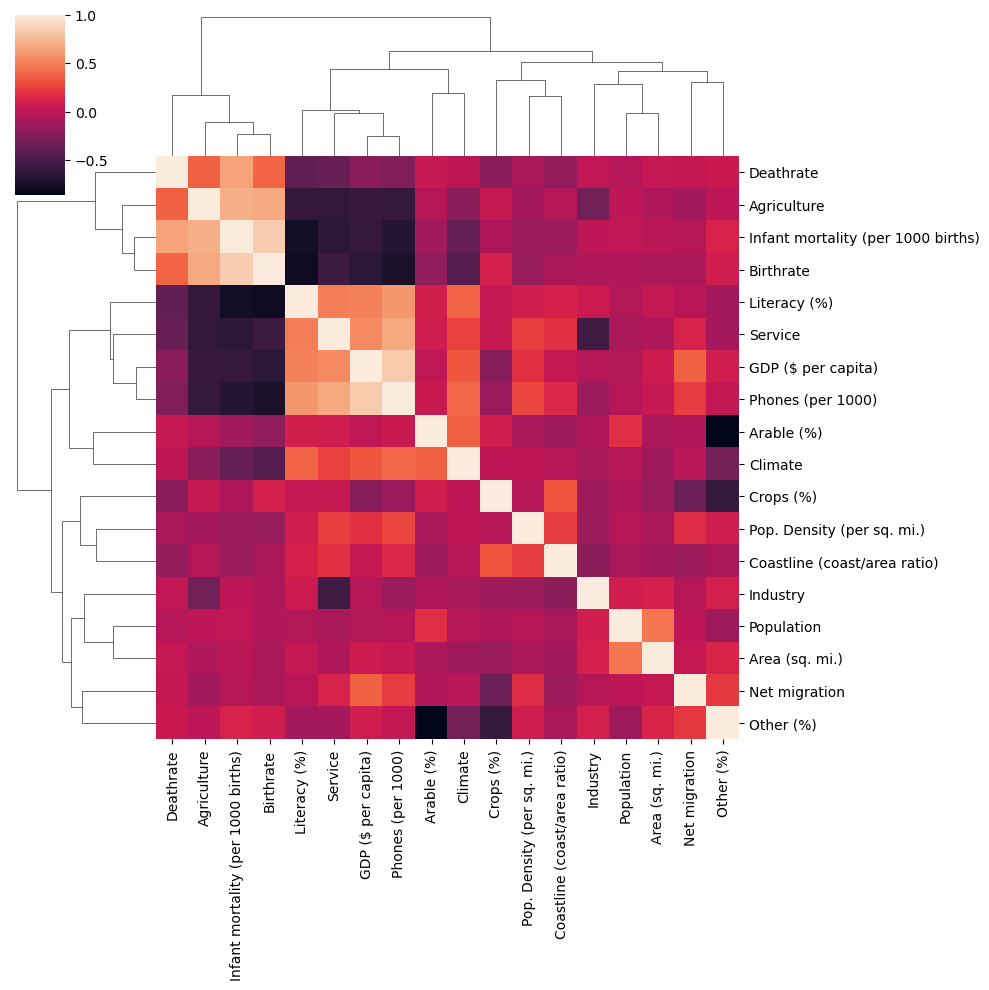

In [258]:
# Clustermap для корреляций между колонками
plt.figure(figsize=(8, 5), dpi=150)
sns.clustermap(data=df.corr())


-----

## Подготовка данных и модель данных


### Отсутствующие данные (Missing Data)

In [259]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [260]:
# Страны с значением NaN в колонке Agriculture
df[df["Agriculture"].isnull()]["Country"]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Большинство этих стран являются маленькими островами, кроме Гринландии и Западной Сахары. Заменим для этих стран отсутствующие значения нулями (во всех колонках)**

In [261]:
df[df["Agriculture"].isnull()] = df[df["Agriculture"].isnull()].fillna(0)

In [262]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Колонка "climate" пустая для нескольких стран. Но для всех стран заполнена колонка Region. Пользуясь этим, заменим отсутствующие значения колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона.**

In [263]:
def fill_climate(region, climate, climates_by_region):
    if  np.isnan(climate):
        return climates_by_region.loc[region]
    return climate

fill_climate_vectorized = np.vectorize(fill_climate, excluded={"climates_by_region"})
df["Climate"] = fill_climate_vectorized(region=df["Region"], 
                                        climate=df["Climate"],
                                        climates_by_region=df.groupby("Region").mean()["Climate"])

In [264]:
df.isnull().sum()


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Заменим отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.**

In [265]:
def fill_literacy(region, literacy, literacy_by_region):
    if  np.isnan(literacy):
        return literacy_by_region.loc[region]
    return literacy

fill_literacy_vectorized = np.vectorize(fill_literacy, excluded={"literacy_by_region"})
df["Literacy (%)"] = fill_literacy_vectorized(region=df["Region"], 
                                        literacy=df["Literacy (%)"],
                                        literacy_by_region=df.groupby("Region").mean()["Literacy (%)"])

In [266]:
df.isnull().sum()


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**Теперь данные отсутствуют только для нескольких стран. Удалим эти страны.**

In [267]:
df = df.dropna()

## Подготовка данных с признаками

**Колонка Country не будет полезной для кластеризации, поскольку она содержит уникальные значения для каждой строки. Удалим эту колонку**

In [268]:
X = df.drop("Country", axis=1)

**Создадим набор признаков X**

In [269]:
X = pd.get_dummies(X, drop_first=True)

In [270]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Масштабирование данных

In [271]:
from sklearn.preprocessing import StandardScaler

In [272]:
scaler = StandardScaler()

In [273]:
scaled_X = scaler.fit_transform(X)

In [274]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Создание и обучение модели Kmeans




In [275]:
from sklearn.cluster import KMeans

In [276]:
ssd = []

for k in range(2, 31):
    model = KMeans(n_clusters=k)
    preds = model.fit_predict(scaled_X)
    ssd.append(model.inertia_)

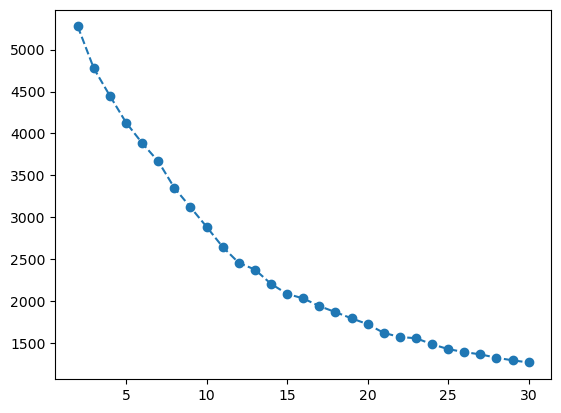

In [277]:
plt.plot(range(2, 31), ssd, ls="--")
plt.scatter(range(2, 31), ssd)

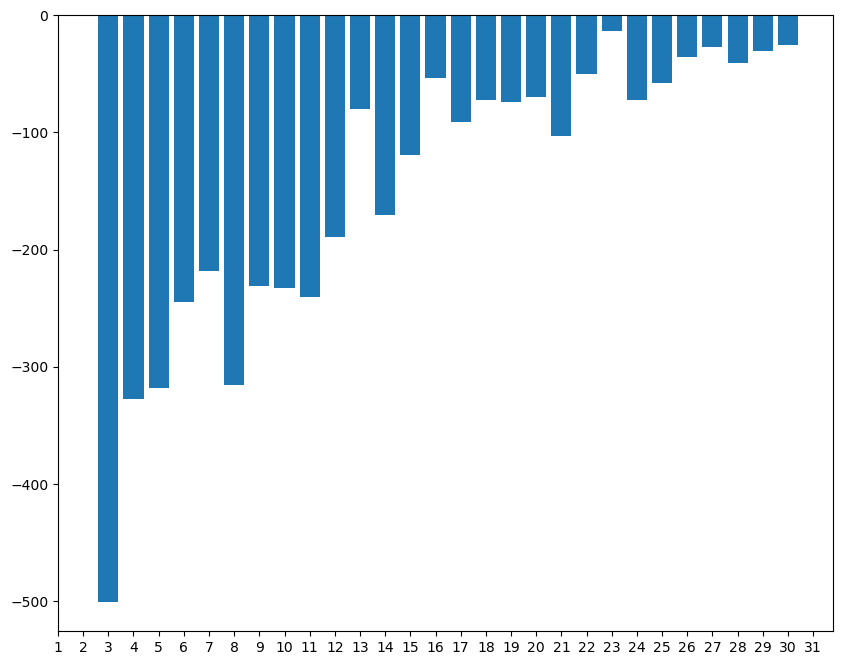

In [278]:
plt.figure(figsize=(10, 8))
plt.bar(range(2,31), pd.Series(ssd).diff())
plt.xticks(ticks=range(1, 32));

-----

# Интерпретация модели


-----


#### Выбираем K=3

**Можно сказать, что в точке K=3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). Посмотрим, какие признаки являются важными в случае 3 кластеров!**

In [279]:
model = KMeans(n_clusters=3)

In [326]:
preds = model.fit_predict(scaled_X)

In [327]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2], dtype=int32)

In [328]:
X["K=3 clusters"] = model.labels_

In [330]:
X.corr()["K=3 clusters"].sort_values()

Literacy (%)                                 -0.418756
Region_LATIN AMER. & CARIB                   -0.385253
Region_OCEANIA                               -0.272054
Phones (per 1000)                            -0.214012
Crops (%)                                    -0.187803
Region_NEAR EAST                             -0.183884
Region_C.W. OF IND. STATES                   -0.172925
Coastline (coast/area ratio)                 -0.158854
Region_NORTHERN AFRICA                       -0.154156
Service                                      -0.115258
GDP ($ per capita)                           -0.081488
Area (sq. mi.)                               -0.066620
Population                                   -0.065076
Industry                                     -0.048845
Other (%)                                    -0.034170
Region_NORTHERN AMERICA                      -0.030240
Pop. Density (per sq. mi.)                    0.014381
Region_BALTICS                                0.033308
Climate   

------------
-------------
## Географическая интерпретация модели

Результаты этой модели можно очень удобно визуализировать на географической карте

----
----

In [331]:
import plotly.express as px

In [3]:
iso = pd.read_csv("./country_iso_codes.csv")

In [353]:
df["Cluster"] = model.labels_


In [364]:
fig = px.choropleth(df.merge(iso, on="Country", how="inner"),
                    locations="ISO Code",
                    color="Cluster",
                    hover_name="Country",
                    color_continuous_scale='Turbo')
fig.show()

---